In [2]:
import pandas as pd
df = pd.read_csv("../songtexte_bereinigt_gekuerzt.csv")

In [2]:
df

,Unnamed: 0,artist,song,text,number_of_tokens
0,0,ABBA,Ahe's My Kind Of Girl,look at her face it's a wonderful face and i...,741
1,1,ABBA,"Andante, Andante",take it easy with me please touch me gently ...,1381
2,2,ABBA,As Good As New,i'll never know why i had to go why i had to ...,1438
3,3,ABBA,Bang,making somebody happy is a question of give an...,1207
4,4,ABBA,Bang-A-Boomerang,making somebody happy is a question of give an...,1223
...,...,...,...,...,...
50827,57642,Ziggy Marley,Friend,i wanna thank you for the things you've done...,691
50828,57643,Ziggy Marley,G7,seven richest countries in the world them hav...,1443
50829,57644,Ziggy Marley,Generation,many generation have passed away fighting for...,1391
50830,57645,Ziggy Marley,Good Old Days,irie days come on play let the angels fly let...,858


In [3]:
df.shape

(50832, 5)

In [4]:
df.text

0        look at her face  it's a wonderful face  and i...
1        take it easy with me  please  touch me gently ...
2        i'll never know why i had to go  why i had to ...
3        making somebody happy is a question of give an...
4        making somebody happy is a question of give an...
                               ...                        
50827      i wanna thank you for the things you've done...
50828    seven richest countries in the world  them hav...
50829    many generation have passed away  fighting for...
50830    irie days come on play  let the angels fly let...
50831    power to the workers  more power  power to the...
Name: text, Length: 50832, dtype: object

In [5]:
df.artist.dropna()

0                ABBA
1                ABBA
2                ABBA
3                ABBA
4                ABBA
             ...     
50827    Ziggy Marley
50828    Ziggy Marley
50829    Ziggy Marley
50830    Ziggy Marley
50831    Ziggy Marley
Name: artist, Length: 50832, dtype: object

In [6]:
a = df.artist.unique()

In [7]:
a.shape

(415,)

Text(0.5, 0, 'Bands')

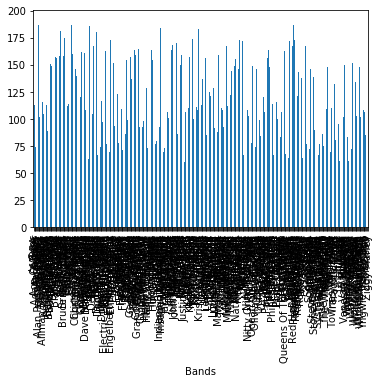

In [9]:
df.groupby('artist').song.count().plot(kind='bar').set_xlabel('Bands')

# UMAP

### Mit Songtexte_bereinigt_gekuerzt.csv und den 5 häufigsten Bands

In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
from collections import Counter
import umap

In [3]:
from yellowbrick.text import UMAPVisualizer

/home/teresa/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
import pandas as pd
df = pd.read_csv("../../currently_dataset/song_decades_long.csv")

In [8]:
c = Counter(df.artist).most_common()[5:]

In [9]:
sample = df.copy()
for el in c:
    sample = sample[sample.artist!=el[0]]
sample

,Unnamed: 0,artist,decades,text,stemmed_text,POS,Genre1,genre1,number_of_tokens,number_of_types
13,206,Aerosmith,1970s,take me on your rocking horse hit the lights ...,take me on your rock hors hit the light and s...,bright light good good good fast last good goo...,Rock,album rock,3479.0,751.0
14,218,Aerosmith,1980s,somebody better call a doctor doctor or wake...,somebodi better call a doctor doctor or wake ...,other magic slow hot magic hot ready magic slo...,Rock,album rock,3766.0,822.0
15,230,Aerosmith,1990s,well i woke up this morning on the wrong side...,well i woke up thi morn on the wrong side of ...,wrong ordinary sick sick many sick rich good r...,Rock,album rock,5881.0,934.0
16,248,Aerosmith,2000s,oh... when you cross that line that you know y...,oh ... when you cross that line that you know...,outta first much bliss line lust sin friend fr...,Rock,album rock,2759.0,566.0
17,258,Aerosmith,2010s,these days are slipping away like thieves in t...,these day are slip away like thiev in the nig...,might precious tasteless empty last many dark ...,Rock,album rock,1105.0,339.0
67,928,Bob Dylan,1960s,"when she said ""don't waste your words they'r...",when she said `` do n't wast your word they '...,deaf cute last jamaican clear red face everybo...,Rock,album rock,9671.0,2318.0
68,954,Bob Dylan,1970s,after a while we took in the clothes nobody ...,after a while we took in the cloth nobodi sai...,old wild thirtieth next dry mad last bad wet w...,Rock,album rock,6608.0,1600.0
69,973,Bob Dylan,1980s,everybody's asking why he couldn't adjust adj...,everybodi 's ask whi he could n't adjust adju...,clean clean old clean napalm clean american ru...,Rock,album rock,3220.0,883.0
70,984,Bob Dylan,1990s,"seen the arrow on the doorpost saying ""this ...",seen the arrow on the doorpost say `` thi lan...,doorpost many barren only big fine young hands...,Rock,album rock,5155.0,1299.0
71,999,Bob Dylan,2000s,beyond the horizon behind the sun at the end...,beyond the horizon behind the sun at the end ...,long easy wretched mortal same cold same many ...,Rock,album rock,3353.0,1048.0


In [10]:
tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(sample.text)
labels = sample.artist

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

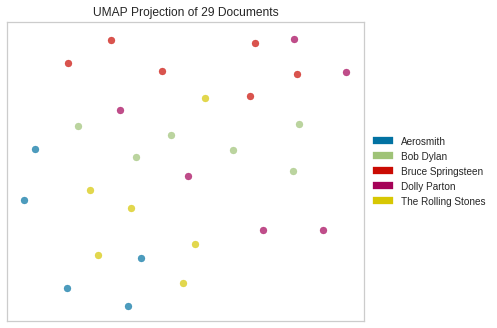

In [11]:
umap = UMAPVisualizer()
umap.fit(docs, labels)
umap.show()

### mit Sample_25_percent.csv und den 5 häufgisten Bands

In [9]:
df = pd.read_csv("../sample_25percent.csv")

In [10]:
c = Counter(df.artist).most_common()[5:]

In [11]:
sample = df.copy()
for el in c:
    sample = sample[sample.artist!=el[0]]
sample

,Unnamed: 0,artist,song,text,number_of_tokens
66,8438,Indigo Girls,Everything In It's Own Time,remember everything i told you keep it in you...,1098
74,7501,Hank Williams Jr.,The Cheatin' Hotel,when you check in the cheatin' hotel you'll b...,1905
131,8449,Indigo Girls,Heartache For Everyone,you spent five years saying you'd come my way ...,1768
133,7498,Hank Williams Jr.,Tee Tot Song,every mornin' ole tee tot come 'round settin'...,1313
136,33842,George Strait,Back To Bein' Me,i'm back to bein' me i'm back to bein' nobody...,916
...,...,...,...,...,...
12565,35292,Hank Williams Jr.,I've Been Around,i've been around. i used to sing songs that w...,841
12581,13057,Michael W. Smith,A Way,[verse 1] caught in a dream of where i want ...,968
12636,43840,Michael W. Smith,Above All,above all powers above all kings above all n...,1232
12652,33884,George Strait,I Met A Friend Of Yours Today,yes i know i'm late gettin' home tonight can...,796


In [12]:
tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(sample.text)
labels = sample.artist

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

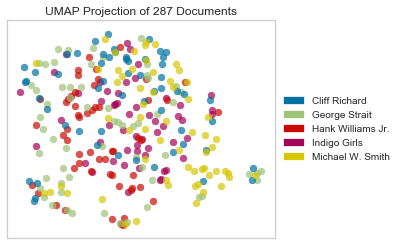

In [14]:
umap = UMAPVisualizer()
umap.fit(docs, labels)
umap.show()

### Mit Songtexte_bereinigt_gekuerzt.csv aber mit allen Bands 

In [5]:
df = pd.read_csv("../songtexte_bereinigt_gekuerzt.csv")

In [6]:
df.head(2)

,Unnamed: 0,artist,song,text,number_of_tokens
0,0,ABBA,Ahe's My Kind Of Girl,look at her face it's a wonderful face and i...,741
1,1,ABBA,"Andante, Andante",take it easy with me please touch me gently ...,1381


In [7]:
tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(df.text)
labels = df.artist

C:\ProgramData\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\ProgramData\Anaconda3\lib\site-packages\umap\sparse.py", line 176:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


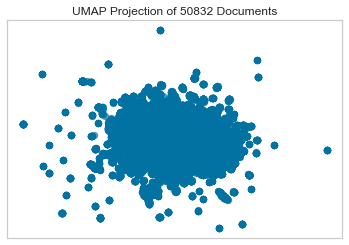

In [9]:
umap = UMAPVisualizer()
umap.fit(docs)
umap.show()

### mit Sample_25_percent.csv aber mit allen Bands

In [19]:
df = pd.read_csv("../sample_25percent.csv")

In [20]:
df.head(2)

,Unnamed: 0,artist,song,text,number_of_tokens
0,20468,Van Halen,Take Your Whiskey Home,well my baby she don't want me around. she ...,1197
1,41605,Lil Wayne,Army Gunz,yeah yeah yeah (i got army gunz) yeah yeah ...,2860


In [21]:
tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(df.text)
labels = df.artist

C:\ProgramData\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\ProgramData\Anaconda3\lib\site-packages\umap\sparse.py", line 176:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

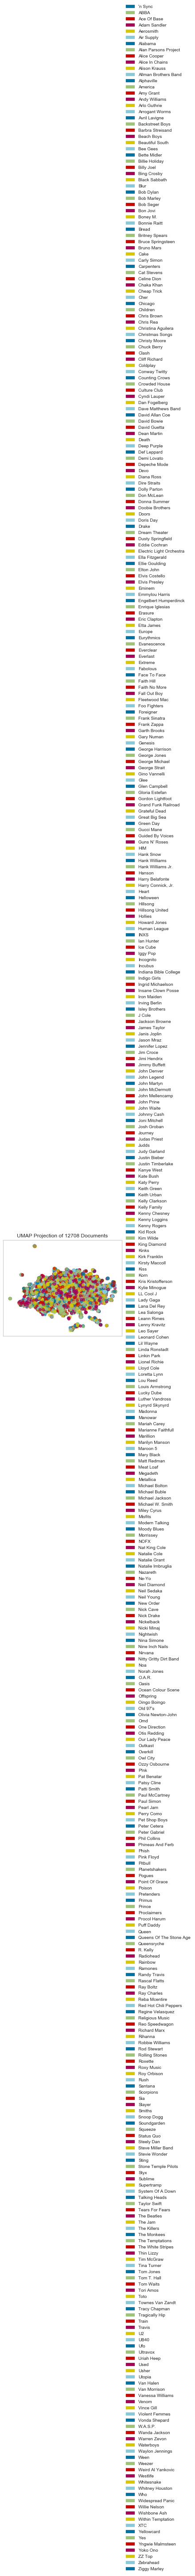

In [22]:
umap = UMAPVisualizer()
umap.fit(docs, labels)
umap.show()

## UMAP mit Songs_100.csv

In [24]:
df = pd.read_csv("../songs_100.csv")

In [25]:
df.head(2)

,Unnamed: 0,artists,song,text,number_of_tokens,check,Genre1,Genre2
0,0,ABBA,I Saw It In The Mirror,i saw it in the mirror i saw it in my face t...,803,False,Pop,Rock
1,1,ABBA,Reina Danzante,you can dance you can jive having the time o...,1106,False,Pop,Rock


In [27]:
tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(df.text)
labels = df.artists

C:\ProgramData\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\ProgramData\Anaconda3\lib\site-packages\umap\sparse.py", line 176:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

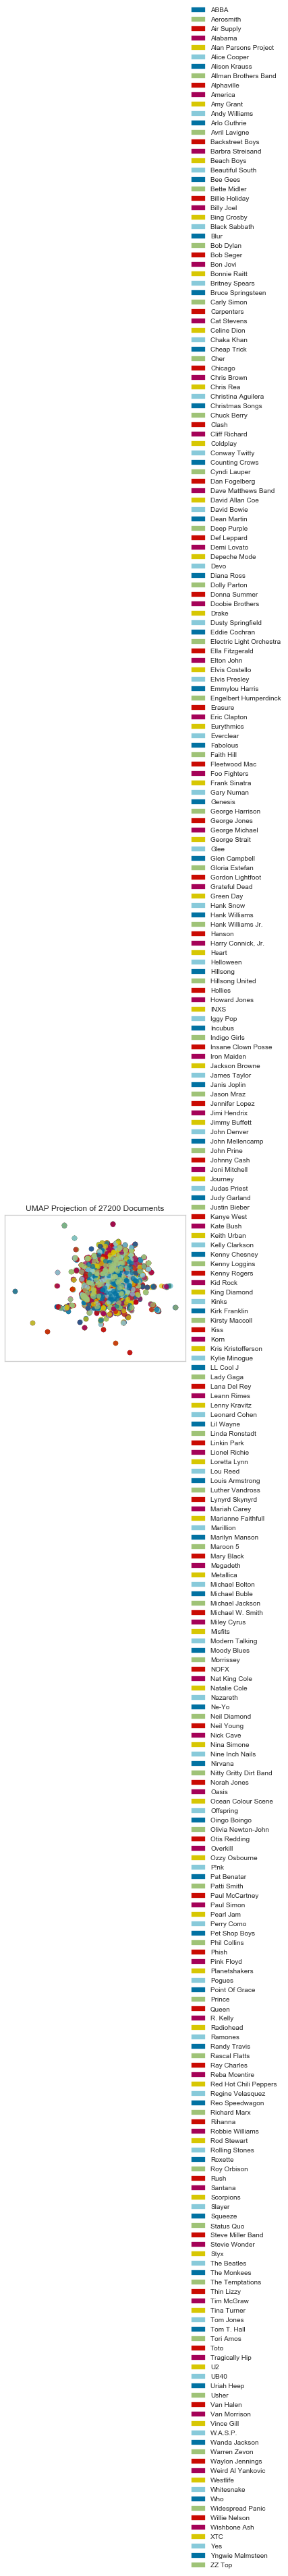

In [28]:
umap = UMAPVisualizer()
umap.fit(docs, labels)
umap.show()

## UMAP mit songs_25.csv

In [10]:
df = pd.read_csv("../songs_25.csv")

In [11]:
df.head(2)

,Unnamed: 0,artists,song,text,number_of_tokens,Genre1,Genre2,check,POS
0,0,ABBA,Me And I,sometimes when i'm mad there's a part of me t...,1551,Pop,Rock,True,mad little sad mean other rainy gloomy funny d...
1,1,ABBA,My Mama Said,tried to sneak out without saying with my lou...,1029,Pop,Rock,True,record la la la la red la la la la dead la la ...


In [12]:
tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(df.text)
labels = df.artists

C:\ProgramData\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\ProgramData\Anaconda3\lib\site-packages\umap\sparse.py", line 176:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

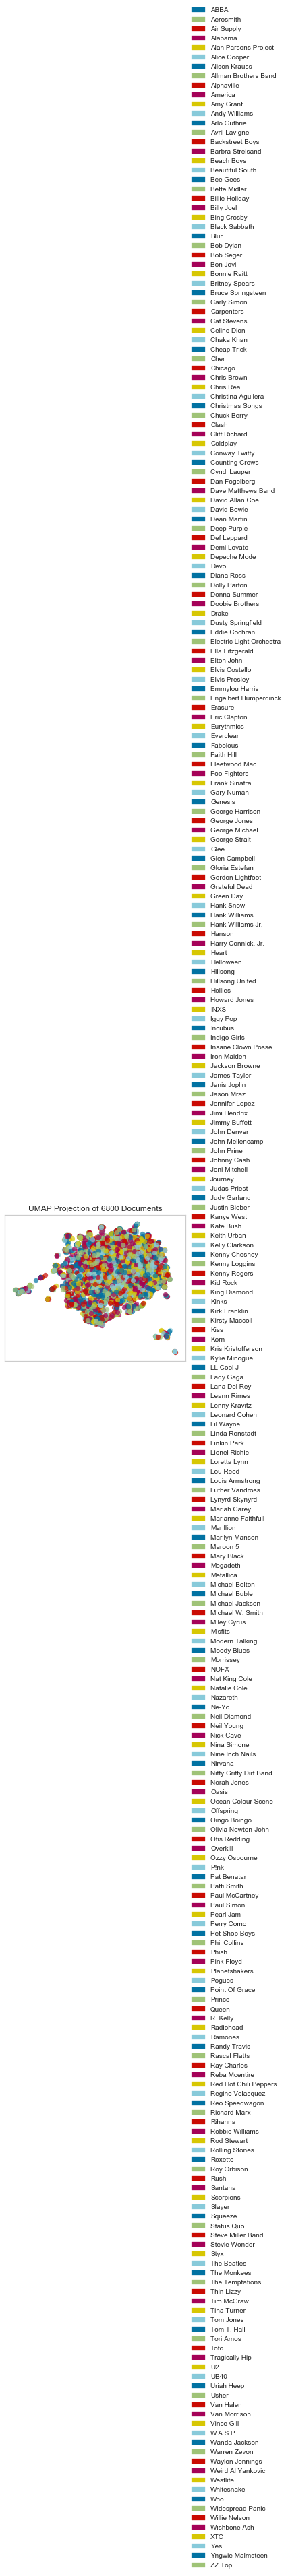

AttributeError: 'UMAPVisualizer' object has no attribute 'savefig'

In [13]:
umap = UMAPVisualizer(metric='cosine')
umap.fit(docs, labels)
umap.show()
umap.savefig("UMAP_Songs_25_Lyrics")

## UMAP mit Songs_25.csv mit KMeans

In [14]:
tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(df.text)
labels = df.Genre1

clusters = KMeans(n_clusters=5)
clusters.fit(docs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\ProgramData\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\ProgramData\Anaconda3\lib\site-packages\umap\sparse.py", line 176:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single 

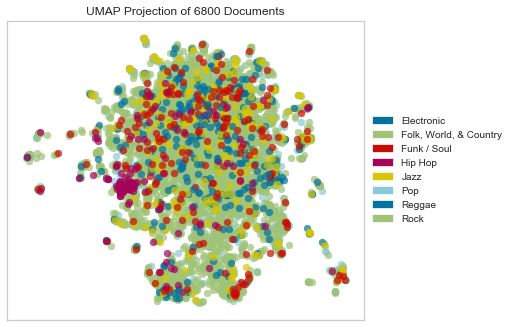

In [15]:
umap = UMAPVisualizer()
umap.fit(docs, labels)
umap.show()

## UMAP mit songs_25.csv + POS

In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from yellowbrick.text import UMAPVisualizer

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("../songs_25.csv")

In [5]:
df.head(2)

,Unnamed: 0,artists,song,text,number_of_tokens,Genre1,Genre2,check,POS
0,0,ABBA,Me And I,sometimes when i'm mad there's a part of me t...,1551,Pop,Rock,True,mad little sad mean other rainy gloomy funny d...
1,1,ABBA,My Mama Said,tried to sneak out without saying with my lou...,1029,Pop,Rock,True,record la la la la red la la la la dead la la ...


In [13]:
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(df.POS.values.astype(str)) 
labels = df.artists

C:\ProgramData\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\ProgramData\Anaconda3\lib\site-packages\umap\sparse.py", line 176:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

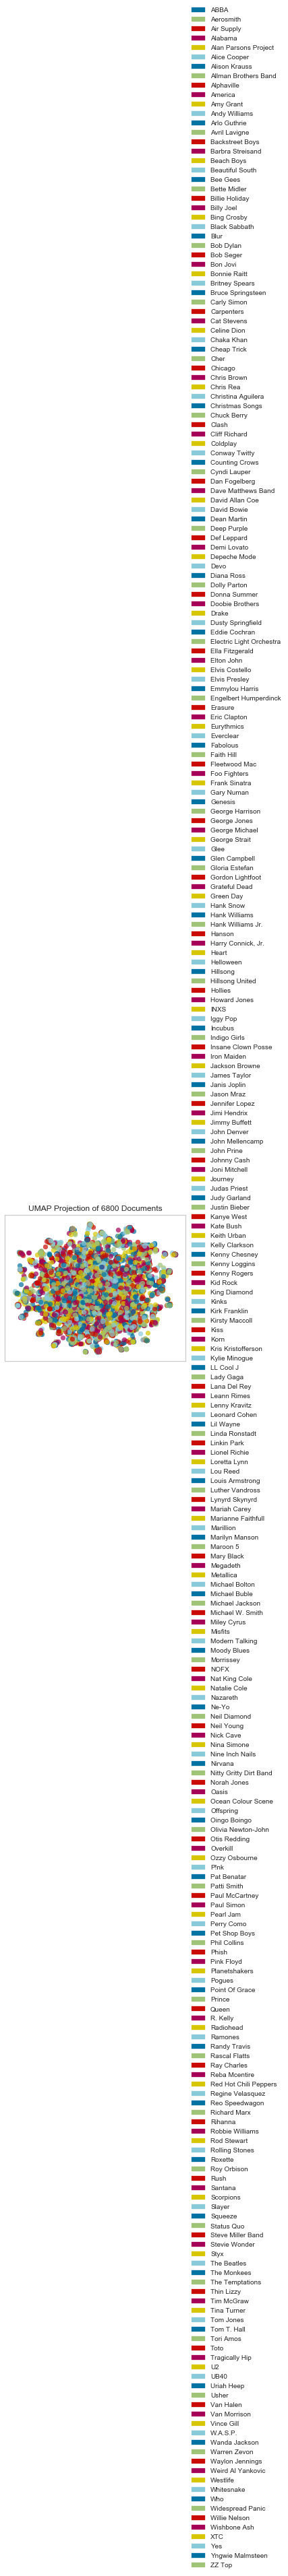

In [14]:
umap = UMAPVisualizer()
umap.fit(features, labels)
umap.show()

## UMAP mit den 5 häufigsten Bands

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
from yellowbrick.text import UMAPVisualizer
from collections import Counter

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv("../songs_25.csv")

In [24]:
df.head(2)

,Unnamed: 0,artists,song,text,number_of_tokens,Genre1,Genre2,check,POS
0,0,ABBA,Me And I,sometimes when i'm mad there's a part of me t...,1551,Pop,Rock,True,mad little sad mean other rainy gloomy funny d...
1,1,ABBA,My Mama Said,tried to sneak out without saying with my lou...,1029,Pop,Rock,True,record la la la la red la la la la dead la la ...


In [39]:
c = Counter(df.Genre1).most_common()[5:]

In [40]:
sample = df.copy()
for el in c:
    sample = sample[sample.Genre1!=el[0]]
sample

,Unnamed: 0,artists,song,text,number_of_tokens,Genre1,Genre2,check,POS
0,0,ABBA,Me And I,sometimes when i'm mad there's a part of me t...,1551,Pop,Rock,True,mad little sad mean other rainy gloomy funny d...
1,1,ABBA,My Mama Said,tried to sneak out without saying with my lou...,1029,Pop,Rock,True,record la la la la red la la la la dead la la ...
2,2,ABBA,Hole In Your Soul,you feel bad let me tell you we all get the ...,1831,Pop,Rock,True,bad bad bad sad loose cool bright romantic bad...
3,3,ABBA,Cassandra,down in the street they're all singing and sho...,1964,Pop,Rock,True,alive dead hollow smart sorry last sorry final...
4,4,ABBA,Just A Notion,just a notion that's all just a feeling that ...,514,Pop,Rock,True,mistaking right wrong special notion feeling m...
...,...,...,...,...,...,...,...,...,...
6795,6795,ZZ Top,36-22-36,what what what you want? hey my thing is a ...,646,Rock,Pop,True,real fine real fine round thing thing thing th...
6796,6796,ZZ Top,Deal Goin' Down,when the deal goin' down and you gonna take yo...,746,Rock,Pop,True,deal chance mystery trance future deal deal no...
6797,6797,ZZ Top,Can't Stop Rockin',i heard about the rock for sometime i know. ...,995,Rock,Pop,True,easy wrong right low loose high rock roll rock...
6798,6798,ZZ Top,I Got The Message,i'm picking up on a signal that's in the air ...,495,Rock,Pop,True,straight electric about empty straight straigh...


In [41]:
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(sample.POS.values.astype(str)) 
labels = sample.Genre1

clusters = KMeans(n_clusters=8, max_iter=300, algorithm = 'auto')
clusters.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\ProgramData\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\ProgramData\Anaconda3\lib\site-packages\umap\sparse.py", line 176:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single 

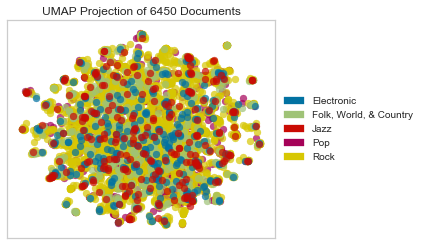

In [42]:
umap = UMAPVisualizer()
umap.fit(features, labels)
umap.show()

## Balkendiagramme

In [1]:
from collections import Counter
import pandas as pd 
df = pd.read_csv("../songs_25.csv")

In [2]:
df.head(2)

,Unnamed: 0,artists,song,text,number_of_tokens,Genre1,Genre2,check,POS
0,0,ABBA,Me And I,sometimes when i'm mad there's a part of me t...,1551,Pop,Rock,True,mad little sad mean other rainy gloomy funny d...
1,1,ABBA,My Mama Said,tried to sneak out without saying with my lou...,1029,Pop,Rock,True,record la la la la red la la la la dead la la ...


In [3]:
c = Counter(df.artists).most_common()[10:]
sample = df.copy()
for el in c:
    sample = sample[sample.artists!=el[0]]
sample

,Unnamed: 0,artists,song,text,number_of_tokens,Genre1,Genre2,check,POS
0,0,ABBA,Me And I,sometimes when i'm mad there's a part of me t...,1551,Pop,Rock,True,mad little sad mean other rainy gloomy funny d...
1,1,ABBA,My Mama Said,tried to sneak out without saying with my lou...,1029,Pop,Rock,True,record la la la la red la la la la dead la la ...
2,2,ABBA,Hole In Your Soul,you feel bad let me tell you we all get the ...,1831,Pop,Rock,True,bad bad bad sad loose cool bright romantic bad...
3,3,ABBA,Cassandra,down in the street they're all singing and sho...,1964,Pop,Rock,True,alive dead hollow smart sorry last sorry final...
4,4,ABBA,Just A Notion,just a notion that's all just a feeling that ...,514,Pop,Rock,True,mistaking right wrong special notion feeling m...
...,...,...,...,...,...,...,...,...,...
245,245,America,Love And Leaving,(gerry beckley and bill mumy) hey slim how ...,1046,Rock,Pop,True,first close new cool clear concealing revealin...
246,246,America,Hat Trick,you can i make it known i'd like to take you...,1773,Rock,Pop,True,known local little little worthwhile little wo...
247,247,America,Till The Sun Comes Up Again,think i'll write a different song got a feeli...,706,Rock,Pop,True,different long bad song feeling time singin se...
248,248,America,"Look Up, Look Down",author unknown (sung by gerry beckley) found ...,880,Rock,Pop,True,second second whole wide second second tired a...


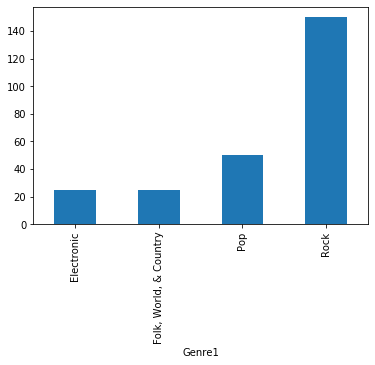

In [6]:
import matplotlib.pyplot as plt
sample.groupby(['Genre1']).artists.count().plot(kind='bar')
plt.savefig('../images/data25/Balkendiagramm_4_haeufigsten_Genre.png', bbox_inches = "tight")

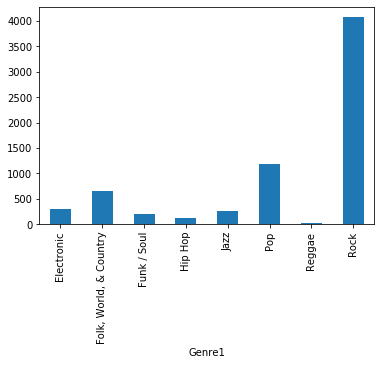

In [7]:
df.groupby(['Genre1']).artists.count().plot(kind='bar')
plt.savefig('../images/data25/Balkendiagramm_Genre1.png', bbox_inches = "tight")

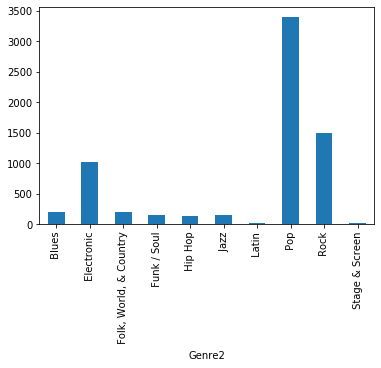

In [9]:
df.groupby(['Genre2']).artists.count().plot(kind='bar')
plt.savefig('../images/data25/Balkendiagramm_Genre2.png', bbox_inches = "tight")

## UMAP

In [15]:
import umap
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [16]:
df = pd.read_csv("../songs_25.csv")

In [17]:
df.head(2)

,Unnamed: 0,artists,song,text,number_of_tokens,Genre1,Genre2,check,POS,stemmed_text
0,0,ABBA,Me And I,sometimes when i'm mad there's a part of me t...,1551,Pop,Rock,True,mad little sad mean other rainy gloomy funny d...,sometim when i 'm mad there 's a part of me t...
1,1,ABBA,My Mama Said,tried to sneak out without saying with my lou...,1029,Pop,Rock,True,record la la la la red la la la la dead la la ...,tri to sneak out without say with my loudest ...


In [18]:
tfidf = TfidfVectorizer()
data = tfidf.fit_transform(df.text)

In [21]:
reducer = umap.UMAP(n_components=2, n_neighbors=7)
Xru = reducer.fit_transform(data)

C:\ProgramData\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\ProgramData\Anaconda3\lib\site-packages\umap\sparse.py", line 176:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


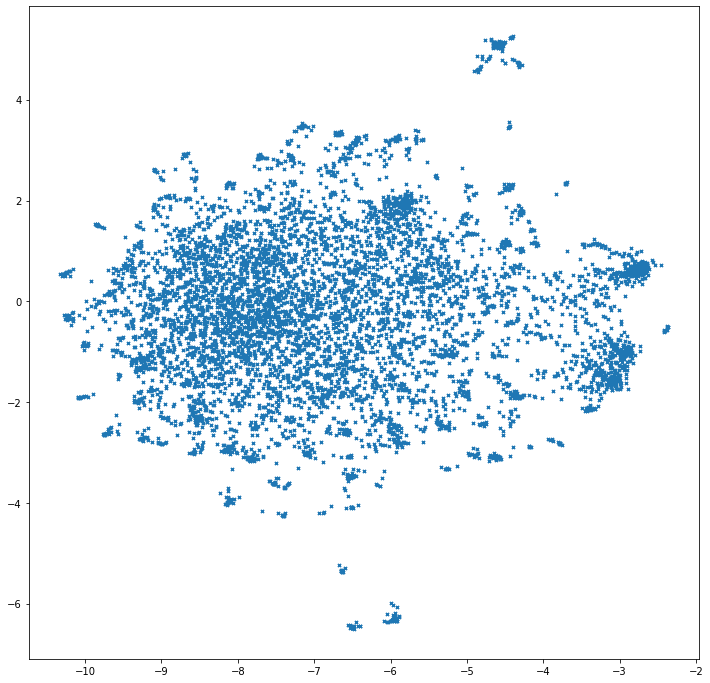

In [20]:
plt.figure(figsize=(12,12))
plt.scatter(Xru[:,0], Xru[:,1], s=10, marker='x')
plt.show()

## UMAP 1.0 ohne KMeans

In [22]:
import pandas as pd

df = pd.read_csv("../songs_25.csv")

C:\ProgramData\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\ProgramData\Anaconda3\lib\site-packages\umap\sparse.py", line 176:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


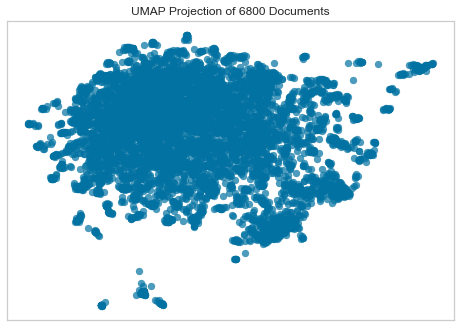

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import UMAPVisualizer

tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(df.text)
#labels = corpus.target

# Instantiate the text visualizer
umap = UMAPVisualizer()
umap.fit(docs)
umap.show()

## UMAP 2.0 mit KMeans

C:\ProgramData\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\ProgramData\Anaconda3\lib\site-packages\umap\sparse.py", line 176:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single 

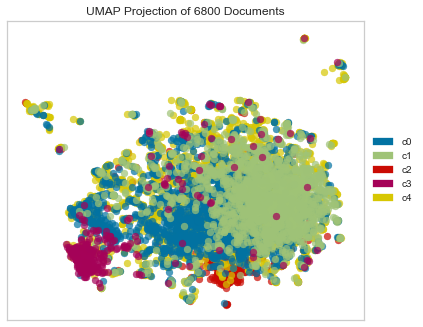

In [28]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import UMAPVisualizer

tfidf = TfidfVectorizer()
docs = tfidf.fit_transform(df.text)

# Instantiate the clustering model
clusters = KMeans(n_clusters = 5, n_init = 20, max_iter = 600, algorithm = 'auto')
clusters.fit(docs)

umap = UMAPVisualizer()
umap.fit(docs, ["c{}".format(c) for c in clusters.labels_])
umap.show()